In [49]:
import numpy as np
1j**2

(-1+0j)

In [50]:
n = 6
n//2

3

In [51]:
def isPowerOfTwo1(n):
    if (n == 0):
        return False
    while (n != 1):
            if (n % 2 != 0):
                return False
            n = n // 2             
    return True

# Function to check if x is power of 2
def isPowerOfTwo (x):
 
    # First x in the below expression
    # is for the case when x is 0
    return (x and (not(x & (x - 1))) )

import math
def Log2(x):
    return (math.log10(x) / math.log10(2));

In [52]:
Log2(6)

2.584962500721156

In [53]:
2**(int(Log2(5))+1)

8

In [54]:
isPowerOfTwo(8)


True

In [55]:
def FFT(P):
    # P = [p0,p1,p2,...pn-1]
    n = len(P)
    if not isPowerOfTwo(n):
        n = 2**(int(Log2(n))+1)
    if n==1:
        return P
    w = np.exp(2*np.pi*1j/n)
    print('n=',n,'w=',w)
    for m in range(1,n+1):
        print(m,w**m)
    Pe, Po = P[::2], P[1::2]
    print('Pe=',Pe,'Po=', Po)
    ye, yo = FFT(Pe), FFT(Po)
    print('ye=',ye, 'yo=',yo)
    y = [0]*n
    print('y=',y,'ye=',ye,'yo=',yo)
    for j in range(n//2):
        print('j=',j)
        y[j] = ye[j] + w**j*yo[j]
        y[j+n//2] = ye[j] - w**j*yo[j]
    print('***************y=',y)
    return y


In [56]:
[0]*6

[0, 0, 0, 0, 0, 0]

In [57]:
1j**2

(-1+0j)

In [58]:
complex(0,1)**2

(-1+0j)

In [59]:
def IFFT(P):
    # P = [p0,p1,p2,...pn-1]
    n = len(P)
    if n==1:
        return P
    w = np.exp(-2*np.pi*1j/n)
    print('n=',n,'w=',w)
    Pe, Po = P[::2], P[1::2]
    print('Pe=',Pe,'Po=', Po)
    ye, yo = IFFT(Pe), IFFT(Po)
    print('ye=',ye, 'yo=',yo)
    y = [0]*n
    for j in range(n//2):
        y[j] = ye[j] + w**j*yo[j]
        y[j+n//2] = ye[j] - w**j*yo[j]
    return y,n

In [60]:
def polynomial(p):
    return lambda x: sum(a*x**i for i, a in enumerate(p))


# example


In [61]:
def round_c(c):
    r = c.real
    i = c.imag
    return np.round(r,1) + np.round(i,1)*1j

In [62]:
P = [3,2,1,7,5,1]
#P = [2,1,7,5,1]
Q = list(reversed(P))
f = polynomial(Q)


(-200.0, 200.0)

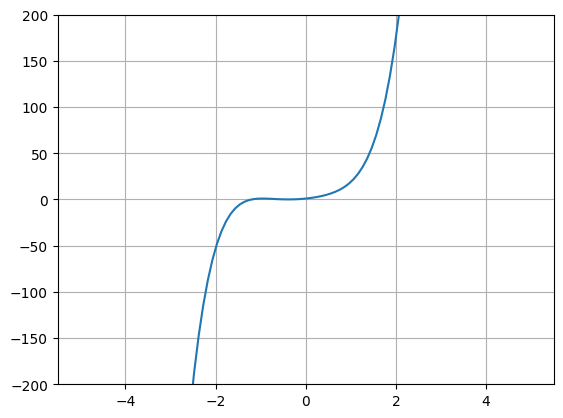

In [63]:
import matplotlib.pyplot as plt
x = np.linspace(-5,5,100)
y = f(x)
plt.plot(x,y)
plt.grid()
plt.ylim(-200,200)

In [64]:
P = [3,2,1,7,5,1]  # high powers, lower indices
P = [1]
P = list(reversed(P))  # must be lower powers, lower indices
P

[1]

In [65]:
Pe2, Po2 = P[::2], P[1::2]
print(Pe2, Po2)
Pee3, Peo3 = Pe2[::2], Pe2[1::2]
Poe3, Poo3 = Po2[::2], Po2[1::2]
print(Pee3, Peo3, Poe3, Poo3)
Pee4, Peo4 = Pee3[::2], Pee3[1::2]
Poe4, Poo4 = Poe3[::2], Poe3[1::2]
print(Pee4, Peo4, Peo3, Poe4, Poo4 ,Poo3)

[1] []
[1] [] [] []
[1] [] [] [] [] []


In [81]:
def eval_pol(Z):
    f = polynomial(Z)
    print(f(1),f(2))
    n = len(Z)
    if not isPowerOfTwo(n):
        n = 2**(int(Log2(n))+1)
    w = np.exp(2*np.pi*1j/n)
    if not isPowerOfTwo(n):
        n = 2**(int(Log2(n))+1)
    
    print(n, round_c(w))
    rv = []
    for k in range(n):
        print(k,round_c(w**k),round_c(f(w**k)))
        rv.append(round_c(f(w**k)))
    return rv


In [83]:
eval_pol(Z)

19 175
8 (0.7+0.7j)
0 (1+0j) (19+0j)
1 (0.7+0.7j) (-0.3+9.1j)
2 1j (-4+7j)
3 (-0.7+0.7j) (-1.7-4.9j)
4 (-1+0j) (1+0j)
5 (-0.7-0.7j) (-1.7+4.9j)
6 (-0-1j) (-4-7j)
7 (0.7-0.7j) (-0.3-9.1j)


[(19+0j),
 (-0.3+9.1j),
 (-4+7j),
 (-1.7-4.9j),
 (1+0j),
 (-1.7+4.9j),
 (-4-7j),
 (-0.3-9.1j)]

In [84]:
n = 8
Z = [1,5,7,1,2,3]
f = polynomial(Z)
w = np.exp(2*np.pi*1j/n)
for k in range(n):
        print(k,w**k,f(w**k))    

0 (1+0j) (19+0j)
1 (0.7071067811865476+0.7071067811865476j) (-0.29289321881345476+9.121320343559644j)
2 1.0000000000000002j (-4.000000000000002+7.0000000000000036j)
3 (-0.7071067811865477+0.7071067811865477j) (-1.7071067811865475-4.878679656440362j)
4 (-1.0000000000000004+0j) (1.0000000000000004+0j)
5 (-0.7071067811865479-0.7071067811865479j) (-1.707106781186547+4.878679656440368j)
6 (-0-1.0000000000000007j) (-4.0000000000000036-7.0000000000000115j)
7 (0.707106781186548-0.707106781186548j) (-0.29289321881346453-9.121320343559649j)


In [68]:
import sympy as sp

In [69]:
x, y = sp.symbols('x, y')
from sympy import Function, Symbol
f = Function('f')
y = 3*x**5+2*x**4+x**3+7*x**2+5*x+1
print(y)
values = {x: np.exp(2*np.pi*1j/8)}
y.evalf(subs=values)

3*x**5 + 2*x**4 + x**3 + 7*x**2 + 5*x + 1


-0.292893218813454 + 9.12132034355964*I

In [85]:
def FFT(P,depth=0,label='P'):
    # P = [p0,p1,p2,...pn-1]
    #depth += 1
    print('\n'+label,P,'depth=',depth)
    n = len(P)
    if not isPowerOfTwo(n):
        n = 2**(int(Log2(n))+1)
    if n==1:
        print('return P=',P)
        return P
    w = np.exp(2*np.pi*1j/n)
    print('n=',n,'w=',w)
    # for m in range(1,n+1):
    #     print(m,w**m)
    Pe, Po = P[::2], P[1::2]
    print('Pe=',Pe,'Po=', Po)
    ye, yo = FFT(Pe,depth=depth+1,label='Pe'), FFT(Po,depth=depth+1,label='Po')
    #print('>>>>>> ye=',ye, 'yo=',yo)
    y = [0]*n
    if len(yo)<len(ye):
        yo = yo*2
    print('>>>>     n=',n,'y=',y,'ye=',ye,'yo=',yo,len(ye),len(yo))
    power= 2**depth
    
    for j in range(n//2):
            print('j=',j,'wj=',round_c(w**j),'power=',power)
            y[j] = round_c(ye[j] + yo[j]*w**(power*j))
            y[j+n//2] = round_c(ye[j] - yo[j]*w**(power*j))
            print('y'+str(j)+'=',y)
    print('return y=',y)
    return y

In [86]:
w = np.exp(2*np.pi*1j/8)
w,w**2

((0.7071067811865476+0.7071067811865476j), 1.0000000000000002j)

In [87]:
values = {x: np.exp(2*np.pi*1j/8)}
y.evalf(subs=values)

-0.292893218813454 + 9.12132034355964*I

In [88]:
Z =[1,5,7,1,2,3]
Z =[1,5,7,1,2,3]
rv = eval_pol(Z)
n,rv


19 175
8 (0.7+0.7j)
0 (1+0j) (19+0j)
1 (0.7+0.7j) (-0.3+9.1j)
2 1j (-4+7j)
3 (-0.7+0.7j) (-1.7-4.9j)
4 (-1+0j) (1+0j)
5 (-0.7-0.7j) (-1.7+4.9j)
6 (-0-1j) (-4-7j)
7 (0.7-0.7j) (-0.3-9.1j)


(8,
 [(19+0j),
  (-0.3+9.1j),
  (-4+7j),
  (-1.7-4.9j),
  (1+0j),
  (-1.7+4.9j),
  (-4-7j),
  (-0.3-9.1j)])

In [89]:
r = FFT(Z)
r


P [1, 5, 7, 1, 2, 3] depth= 0
n= 8 w= (0.7071067811865476+0.7071067811865476j)
Pe= [1, 7, 2] Po= [5, 1, 3]

Pe [1, 7, 2] depth= 1
n= 4 w= (6.123233995736766e-17+1j)
Pe= [1, 2] Po= [7]

Pe [1, 2] depth= 2
n= 2 w= (-1+1.2246467991473532e-16j)
Pe= [1] Po= [2]

Pe [1] depth= 3
return P= [1]

Po [2] depth= 3
return P= [2]
>>>>     n= 2 y= [0, 0] ye= [1] yo= [2] 1 1
j= 0 wj= (1+0j) power= 4
y0= [(3+0j), (-1+0j)]
return y= [(3+0j), (-1+0j)]

Po [7] depth= 2
return P= [7]
>>>>     n= 4 y= [0, 0, 0, 0] ye= [(3+0j), (-1+0j)] yo= [7, 7] 2 2
j= 0 wj= (1+0j) power= 2
y0= [(10+0j), 0, (-4+0j), 0]
j= 1 wj= 1j power= 2
y1= [(10+0j), (-8+0j), (-4+0j), (6+0j)]
return y= [(10+0j), (-8+0j), (-4+0j), (6+0j)]

Po [5, 1, 3] depth= 1
n= 4 w= (6.123233995736766e-17+1j)
Pe= [5, 3] Po= [1]

Pe [5, 3] depth= 2
n= 2 w= (-1+1.2246467991473532e-16j)
Pe= [5] Po= [3]

Pe [5] depth= 3
return P= [5]

Po [3] depth= 3
return P= [3]
>>>>     n= 2 y= [0, 0] ye= [5] yo= [3] 1 1
j= 0 wj= (1+0j) power= 4
y0= [(8+0j), (2+0j)]


[(19+0j),
 (-7.3+0.7j),
 (-4+7j),
 (3.9+2.1j),
 (1+0j),
 (-8.7-0.7j),
 (-4-7j),
 (8.1-2.1j)]

In [90]:
rv

[(19+0j),
 (-0.3+9.1j),
 (-4+7j),
 (-1.7-4.9j),
 (1+0j),
 (-1.7+4.9j),
 (-4-7j),
 (-0.3-9.1j)]

: 

In [47]:
x, y = sp.symbols('x, y')
from sympy import Function, Symbol
f = Function('f')
y = 3*x**5+2*x**4+x**3+7*x**2+5*x+1
print(y)
values = {x: np.exp(2*np.pi*1j/8)}
y.evalf(subs=values)

3*x**5 + 2*x**4 + x**3 + 7*x**2 + 5*x + 1


-0.292893218813454 + 9.12132034355964*I

In [35]:
rv

[(19+0j),
 (-0.5+6.1j),
 (-6.5-2.6j),
 (1+0j),
 (-6.5+2.6j),
 (-0.5-6.1j),
 (19+0j),
 (-0.5+6.1j)]

In [36]:
r==rv

False

In [37]:
R = FFT(P)
R


P [1] depth= 0
return P= [1]


[1]

In [38]:
#P =[1,5,7]
f = polynomial(P)

In [39]:
f(1),f(1j),f(-1),f(-1j)


(1, (1+0j), 1, (1+0j))

In [40]:
f(0.7071067811865476+0.7071067811865476j),f(-0.7071067811865476+0.7071067811865476j)


((1+0j), (1+0j))

In [41]:
f(-0.7071067811865476-0.7071067811865476j),f(0.7071067811865476-0.7071067811865476j)

((1+0j), (1+0j))

In [42]:
def imag2point(P):
    return [(np.real(k),np.imag(k)) for k in P ]

In [43]:
R = imag2point(R)
R

[(1, 0)]

In [44]:
P = (-1,-1,1,1)
FFT(P)


P (-1, -1, 1, 1) depth= 0
n= 4 w= (6.123233995736766e-17+1j)
Pe= (-1, 1) Po= (-1, 1)

Pe (-1, 1) depth= 1
n= 2 w= (-1+1.2246467991473532e-16j)
Pe= (-1,) Po= (1,)

Pe (-1,) depth= 2
return P= (-1,)

Po (1,) depth= 2
return P= (1,)
>>>>     n= 2 y= [0, 0] ye= (-1,) yo= (1,) 1 1
j= 0 wj= (1+0j) power= 2
y0= [0j, (-2+0j)]
return y= [0j, (-2+0j)]

Po (-1, 1) depth= 1
n= 2 w= (-1+1.2246467991473532e-16j)
Pe= (-1,) Po= (1,)

Pe (-1,) depth= 2
return P= (-1,)

Po (1,) depth= 2
return P= (1,)
>>>>     n= 2 y= [0, 0] ye= (-1,) yo= (1,) 1 1
j= 0 wj= (1+0j) power= 2
y0= [0j, (-2+0j)]
return y= [0j, (-2+0j)]
>>>>     n= 4 y= [0, 0, 0, 0] ye= [0j, (-2+0j)] yo= [0j, (-2+0j)] 2 2
j= 0 wj= (1+0j) power= 1
y0= [0j, 0, 0j, 0]
j= 1 wj= 1j power= 1
y1= [0j, (-2-2j), 0j, (-2+2j)]
return y= [0j, (-2-2j), 0j, (-2+2j)]


[0j, (-2-2j), 0j, (-2+2j)]